In [1]:
from tensorflow.keras.models import Sequential

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(-1, 28,28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)


C:\Users\adity\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9156 - loss: 0.2832
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9856 - loss: 0.0497
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9897 - loss: 0.0333
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9939 - loss: 0.0190
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9960 - loss: 0.0134
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9826 - loss: 0.0566
Test Accuracy: 0.9861000180244446


Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.5844 - loss: 0.6424 - val_accuracy: 0.8374 - val_loss: 0.3916
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8687 - loss: 0.3230 - val_accuracy: 0.8478 - val_loss: 0.3814
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8450 - loss: 0.3811


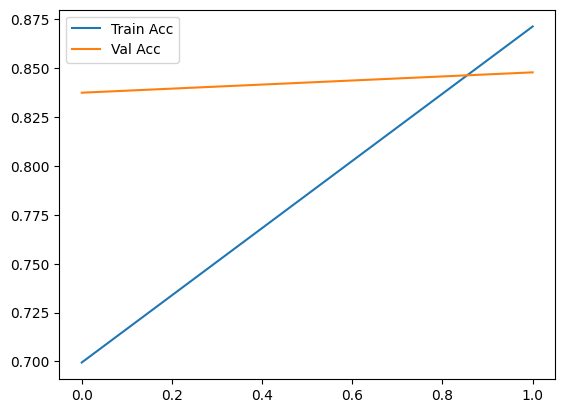

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=10000
max_length=200
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)
X_train=pad_sequences(X_train, maxlen=max_length)
X_test=pad_sequences(X_test, maxlen=max_length)

model=Sequential([
    Embedding(vocab_size,8),
    Bidirectional(LSTM(8,return_sequences=False)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=2,batch_size=32,validation_split=0.2)

model.evaluate(X_test,y_test)

plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.show()

Epoch 1/10


C:\Users\adity\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0733 - mae: 0.2051
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0193 - mae: 0.1247
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088 - mae: 0.0823
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8202e-04 - mae: 0.0247
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5063e-04 - mae: 0.0177
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1470e-04 - mae: 0.0147
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0345e-04 - mae: 0.0115
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3316e-04 - mae: 0.0092
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1033e-04 - mae: 0.0088
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5830e-05 - mae: 0.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Next forecasted temperature: -0.5345236


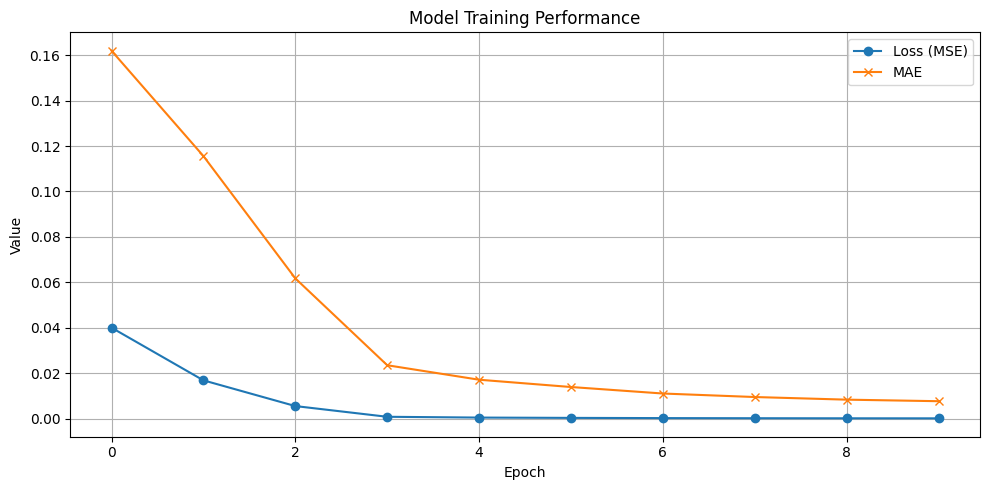

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


data = np.sin(np.arange(0, 100, 0.1))  
df = pd.DataFrame(data, columns=['temp'])


scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)


X, y = [], []
for i in range(10, len(scaled)):
    X.append(scaled[i-10:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1)) 


model = Sequential([
    LSTM(50, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history=model.fit(X, y, epochs=10, batch_size=16, verbose=1)


last_seq = scaled[-10:].reshape((1, 10, 1))
predicted = model.predict(last_seq)
predicted_temp = scaler.inverse_transform(predicted)
print("Next forecasted temperature:", predicted_temp[0][0])

import matplotlib.pyplot as plt




plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (MSE)', marker='o')
plt.plot(history.history['mae'], label='MAE', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Training Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()